# How To Pick A Good Cointegrating Pair

## Introduction
A time series is considered stationary if its probability distribution does not change over time.
If the price series of a security is stationary, then it would be a suitable candidate for a mean-reversion trading strategy.
However, most security price series are not stationary: they seem to follow a lognormal random walk; and drift farther and farther away from the initial value. 

We need to find a pair of securities such that the combination of the two is stationary, e.g. buying a security and shorting another.
Two securities that form a stationary or cointegrating pair are often from the same industry group such as Coca-Cola Company and PepsiCo.
In this article, we illustrate how to pick a good cointegrating pair by applying the augmented Dickey-Fuller test to security pairs to check for cointegration.

## Step-by-step
We will proceed as follows:
1. Determine The Pairs: We present the security pairs to analyze.
2. Prepare The Data: We pull and process securities' open-high-low-close-volume (OHLCV) data.
3. Calculate The Spread: We apply the ordinary least squares (OLS) method to calculate the spread between two securities.
4. Check For Cointegration: We use the augmented Dickey-Fuller test to check if two securities form a stationary or cointegrating pair.

## Determine The Pairs
Below are the pairs of securities which we will check for cointegration:

### 1. Gold
Gold-themed exchange traded funds (ETF):
- VanEck Vectors Gold Miners ETF (GDX): ETF which tracks a basket of gold-mining companies.
- SPDR Gold Shares (GLD): ETF which replicates the price of gold bullion.

### 2. Fast Food
Companies serving fast food:
- McDonald's Corporation (MCD): Fast food company which gave the whole world classics like *Big Mac*, *Hot Fudge Sundae*, and *Happy Meal*.
- YUM! Brands, Inc. (YUM): Fast food company which operates Taco Bell, KFC and Pizza Hut.
    
### 3. Cryptocurrencies
Digital currencies:
- Bitcoin USD (BTC-USD): A decentralized cryptocurrency that can be sent from user to user on the peer-to-peer bitcoin network established in 2009.
- Ethereum USD (ETH-USD): An open source, public, blockchain-based distributed computing platform and operating system released in 2015.

## Prepare The Data
In this section, we illustrate download and preparation of securities' price series.
We pull the securities' historical OHLCV data from [Yahoo Finance](https://sg.finance.yahoo.com).
We select the adjusted close prices for each security and create a new Dataframe object.

Import packages

In [1]:
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt

Magic

In [2]:
%matplotlib inline

Set tickers list

In [3]:
tickers = ['GDX', 'GLD', 'MCD', 'YUM', 'BTC-USD', 'ETH-USD']

Pull OHLCV data

In [21]:
# Initialize list of DataFrames
df_list = []

# Load DataFrames
for i in tickers:
    
    # Load data
    df = pd.read_csv(i + '.csv', index_col=0, parse_dates=True)    
    
    # Set multi-level columns
    df.columns = pd.MultiIndex.from_product([[i], ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
    
    # Update list
    df_list.append(df)
    
# Merge DataFrames
data = pd.concat(df_list, axis=1, join='inner')

# Drop NaNs
data.dropna(inplace=True)

Inspect OHLCV data

In [5]:
data.head()

GDX                                                    GLD  \
             Open   High    Low  Close  Adj Close     Volume        Open   
Date                                                                       
2015-08-06  13.21  13.69  13.11  13.36  13.033523   69121200  104.150002   
2015-08-07  13.42  13.85  13.33  13.40  13.072546   50618200  104.559998   
2015-08-10  13.57  14.29  13.36  14.27  13.921287   91376800  105.029999   
2015-08-11  14.44  14.53  13.94  14.53  14.174931   53731900  106.489998   
2015-08-12  14.81  15.53  14.78  15.52  15.140740  123217200  106.989998   

                                                ...       BTC-USD              \
                  High         Low       Close  ...           Low       Close   
Date                                            ...                             
2015-08-06  104.860001  104.139999  104.389999  ...    274.279999  277.890015   
2015-08-07  105.379997  104.550003  104.650002  ...    257.420013  258.600006   
2015-08-10  106.269997  104.919998  105.720001  ...    261.440002  269.029999   
2015-08-11  106.629997  105.769997  106.260002  ...    263.660004  267.660004   
2015-08-12  107.910004  106.930000  107.750000  ...    261.279999  263.440002   

                                 ETH-USD                                  \
             Adj Close    Volume    Open   High     Low  Close Adj Close   
Date                                                                       
2015-08-06  277.890015  11919665  0.6747  3.000  0.6747  3.000     3.000   
2015-08-07  258.600006  22308123  3.0000  3.000  0.1500  1.200     1.200   
2015-08-10  269.029999  13681939  1.2000  1.200  0.6504  0.990     0.990   
2015-08-11  267.660004  15232934  0.9900  1.288  0.9050  1.288     1.288   
2015-08-12  263.440002  14962211  1.2880  1.885  1.2630  1.885     1.885   

                   
           Volume  
Date               
2015-08-06    371  
2015-08-07   1438  
2015-08-10   7419  
2015-08-11   2376  
2015-08-12   4923  

[5 rows x 36 columns]

For WordPress

In [36]:
data.head()[['GDX', 'GLD']]

GDX                                                    GLD  \
             Open   High    Low  Close  Adj Close     Volume        Open   
Date                                                                       
2015-08-06  13.21  13.69  13.11  13.36  13.033523   69121200  104.150002   
2015-08-07  13.42  13.85  13.33  13.40  13.072546   50618200  104.559998   
2015-08-10  13.57  14.29  13.36  14.27  13.921287   91376800  105.029999   
2015-08-11  14.44  14.53  13.94  14.53  14.174931   53731900  106.489998   
2015-08-12  14.81  15.53  14.78  15.52  15.140740  123217200  106.989998   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2015-08-06  104.860001  104.139999  104.389999  104.389999   3908100  
2015-08-07  105.379997  104.550003  104.650002  104.650002   4400900  
2015-08-10  106.269997  104.919998  105.720001  105.720001   5892600  
2015-08-11  106.629997  105.769997  106.260002  106.260002   4060900  
2015-08-12  107.910004  106.930000  107.750000  107.750000  10022500

In [6]:
data.tail()

GDX                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2019-07-08  25.450001  25.610001  25.209999  25.420000  25.420000  40606100   
2019-07-09  25.330000  25.660000  25.209999  25.650000  25.650000  37529700   
2019-07-10  26.020000  26.230000  25.770000  26.200001  26.200001  56454300   
2019-07-11  26.129999  26.280001  25.719999  25.940001  25.940001  54013400   
2019-07-12  26.000000  26.250000  25.870001  26.209999  26.209999  31795200   

                   GLD                                        ...      \
                  Open        High         Low       Close    ...       
Date                                                          ...       
2019-07-08  132.179993  132.339996  131.279999  131.289993    ...       
2019-07-09  131.429993  132.100006  131.160004  131.750000    ...       
2019-07-10  132.940002  133.869995  132.350006  133.830002    ...       
2019-07-11  133.580002  133.699997  132.410004  132.699997    ...       
2019-07-12  132.889999  133.690002  132.529999  133.529999    ...       

                 BTC-USD                                             ETH-USD  \
                     Low         Close     Adj Close      Volume        Open   
Date                                                                           
2019-07-08  12117.309570  12567.019531  12567.019531   993891866  313.339996   
2019-07-09  11569.940430  12099.120117  12099.120117  1554955347  307.890015   
2019-07-10  11002.389648  11343.120117  11343.120117  1185222449  288.640015   
2019-07-11  11096.610352  11797.370117  11797.370117   647690095  268.559998   
2019-07-12  10827.530273  11363.969727  11363.969727   668325183  275.410004   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2019-07-08  318.320007  303.089996  307.890015  307.890015  125850428  
2019-07-09  314.739990  281.619995  288.640015  288.640015  180940011  
2019-07-10  288.660004  263.000000  268.559998  268.559998  171079615  
2019-07-11  279.059998  266.459991  275.410004  275.410004   76685542  
2019-07-12  275.720001  261.809998  268.940002  268.940002   66861426  

[5 rows x 36 columns]

For WordPress

In [37]:
data.tail()[['GDX', 'GLD']]

GDX                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2019-07-08  25.450001  25.610001  25.209999  25.420000  25.420000  40606100   
2019-07-09  25.330000  25.660000  25.209999  25.650000  25.650000  37529700   
2019-07-10  26.020000  26.230000  25.770000  26.200001  26.200001  56454300   
2019-07-11  26.129999  26.280001  25.719999  25.940001  25.940001  54013400   
2019-07-12  26.000000  26.250000  25.870001  26.209999  26.209999  31795200   

                   GLD                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2019-07-08  132.179993  132.339996  131.279999  131.289993  131.289993   
2019-07-09  131.429993  132.100006  131.160004  131.750000  131.750000   
2019-07-10  132.940002  133.869995  132.350006  133.830002  133.830002   
2019-07-11  133.580002  133.699997  132.410004  132.699997  132.699997   
2019-07-12  132.889999  133.690002  132.529999  133.529999  133.529999   

                      
              Volume  
Date                  
2019-07-08   8028900  
2019-07-09   6633400  
2019-07-10  13920600  
2019-07-11   7535100  
2019-07-12   6308600

Select adjusted close prices

In [7]:
# Initialize dictionary of adjusted close
close_dict = {}

# Update dictionary
for i in tickers:
    close_dict[i] = data[i]['Adj Close']
    
# Create DataFrame
close = pd.DataFrame(close_dict)

Inspect adjusted close prices

In [8]:
close.head()

,GDX,GLD,MCD,YUM,BTC-USD,ETH-USD
Date,,,,,,
2015-08-06,13.033523,104.389999,89.038742,57.964733,277.890015,3.000
2015-08-07,13.072546,104.650002,88.653343,57.859062,258.600006,1.200
2015-08-10,13.921287,105.720001,89.074577,57.997757,269.029999,0.990
2015-08-11,14.174931,106.260002,88.554787,55.171165,267.660004,1.288
2015-08-12,15.140740,107.750000,88.079796,53.282372,263.440002,1.885


In [9]:
close.tail()

,GDX,GLD,MCD,YUM,BTC-USD,ETH-USD
Date,,,,,,
2019-07-08,25.420000,131.289993,212.160004,110.050003,12567.019531,307.890015
2019-07-09,25.650000,131.750000,212.089996,110.489998,12099.120117,288.640015
2019-07-10,26.200001,133.830002,213.000000,110.980003,11343.120117,268.559998
2019-07-11,25.940001,132.699997,212.690002,111.500000,11797.370117,275.410004
2019-07-12,26.209999,133.529999,212.990005,111.050003,11363.969727,268.940002


Consider the training set from 2018 to present

In [10]:
training = close['2018-01-01':'2020-01-01'].copy()

Inspect training set

In [11]:
training.head()

,GDX,GLD,MCD,YUM,BTC-USD,ETH-USD
Date,,,,,,
2018-01-02,23.694632,125.150002,166.895370,79.503891,14754.129883,861.969971
2018-01-03,23.445948,124.820000,166.192001,79.435699,15156.620117,941.099976
2018-01-04,23.595158,125.459999,167.357834,80.244370,15180.080078,944.830017
2018-01-05,23.545422,125.330002,167.695084,80.712036,16954.779297,967.130005
2018-01-08,23.296738,125.309998,167.579422,80.848442,14976.169922,1136.109985


In [12]:
training.tail()

,GDX,GLD,MCD,YUM,BTC-USD,ETH-USD
Date,,,,,,
2019-07-08,25.420000,131.289993,212.160004,110.050003,12567.019531,307.890015
2019-07-09,25.650000,131.750000,212.089996,110.489998,12099.120117,288.640015
2019-07-10,26.200001,133.830002,213.000000,110.980003,11343.120117,268.559998
2019-07-11,25.940001,132.699997,212.690002,111.500000,11797.370117,275.410004
2019-07-12,26.209999,133.529999,212.990005,111.050003,11363.969727,268.940002


Calculate the number of pairs

In [13]:
no_pairs = round(0.5 * len(tickers))

Plot the adjusted close prices

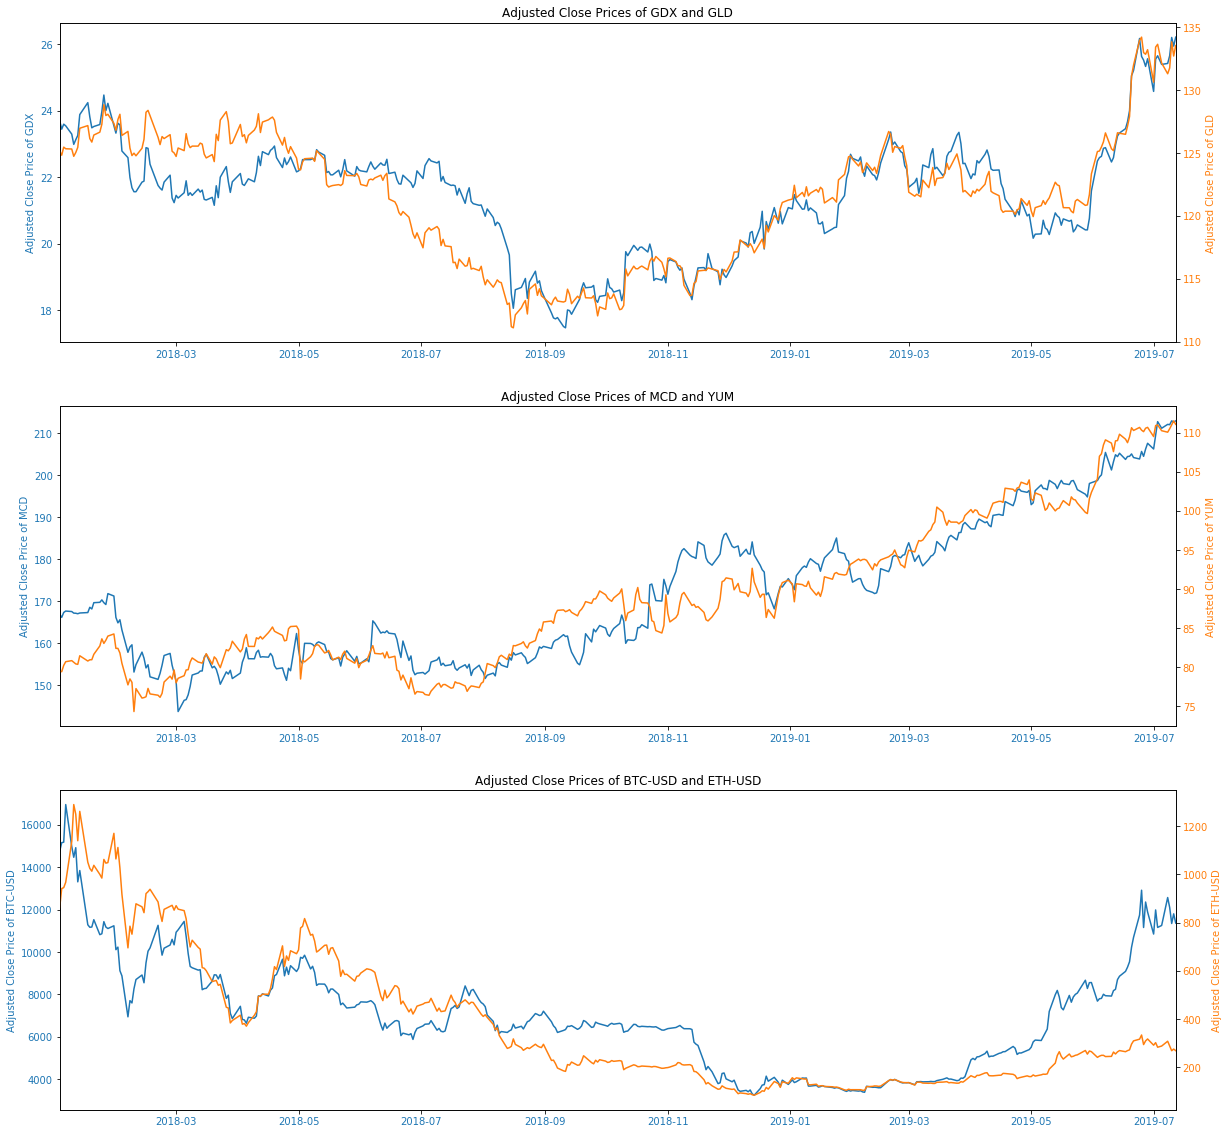

In [14]:
plt.figure(figsize=(20, 20))

for i in range(no_pairs):
    # Primary axis
    color = 'tab:blue'
    ax1 = plt.subplot(3, 1, i+1)
    plt.plot(training[tickers[2*i]], color=color)
    ax1.set_ylabel('Adjusted Close Price of ' + tickers[2*i], color=color)
    ax1.tick_params(labelcolor=color)
    
    # Secondary axis 
    color = 'tab:orange'
    ax2 = ax1.twinx()
    plt.plot(training[tickers[2*i+1]], color=color)
    ax2.set_ylabel('Adjusted Close Price of ' + tickers[2*i+1], color=color)
    ax2.tick_params(labelcolor=color)
    
    # Both axis
    plt.xlim([training.index[0], training.index[-1]])
    plt.title('Adjusted Close Prices of ' + tickers[2*i] + ' and ' + tickers[2*i+1])

## Calculate The Spread
In this section, we calculate the spread between the securities.
We apply the OLS method between the securities to calculate for the hedge ratio.
We standardize the spread by subtracting the mean and scaling by the standard deviation of the spread.

Calculate the spread between each pair

In [32]:
# Initialize the spread list
spread_list = []

for i in range(no_pairs):
    # Run an OLS regression between the pairs
    model = sm.regression.linear_model.OLS(training[tickers[2*i]], training[tickers[2*i+1]])

    # Calculate the hedge ratio
    results = model.fit()
    hedge_ratio = results.params[0]
    
    # Calculate the spread
    spread = training[tickers[2*i]] - hedge_ratio * training[tickers[2*i+1]]
    
    # Mean and standard deviation of the spread
    spread_mean = spread.mean()
    spread_std = spread.std()
    
    # Standardize the spread
    z_score = (spread - spread_mean) / spread_std
    
    # Update the spread list
    spread_list.append(z_score)

Plot the spread

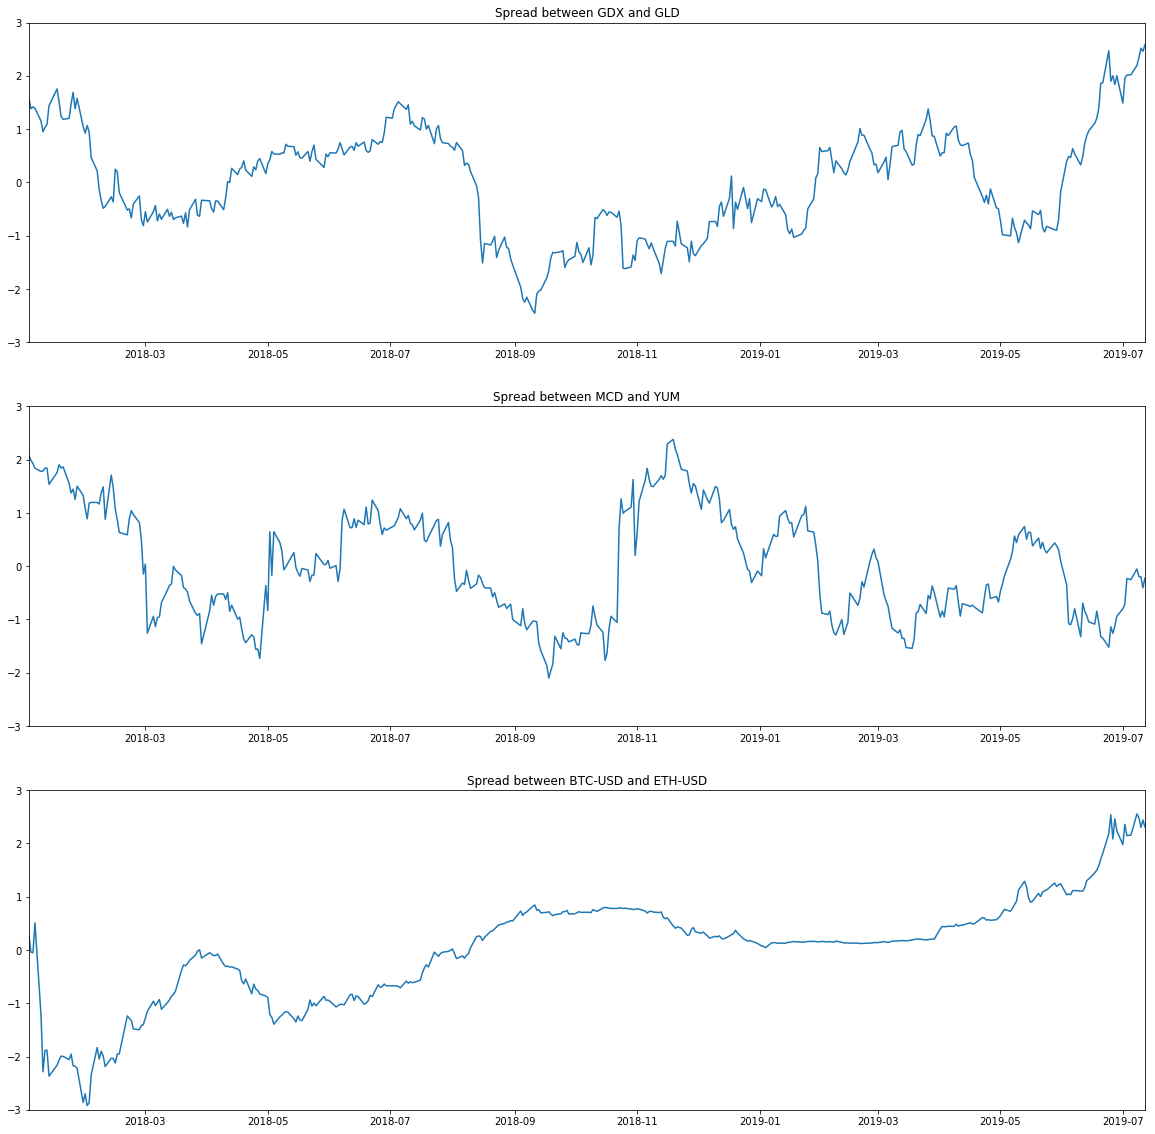

In [16]:
plt.figure(figsize=(20, 20))

for i in range(no_pairs):
    plt.subplot(3, 1, i+1)
    plt.plot(spread_list[i])
    plt.xlim([spread.index[0], spread.index[-1]])
    plt.ylim([-3, 3])
    plt.title('Spread between ' + tickers[2*i] + ' and ' + tickers[2*i+1])

## Check For Cointegration
In this section, we test if two securities form a stationary or cointegrating pair.
We use the augmented Dickey-Fuller (ADF) test where we have the following:
1. The **null hypothesis** is that a unit root is present in the price series, it is **non-stationary**.
2. The **alternative** is that unit root is not present in the prices series, it is **stationary**.

Run cointegration check using augmented Dickey-Fuller test

In [17]:
# Initialize stats
stats_list = []

for i in range(len(spread_list)):
    
    # ADF test
    stats = adfuller(spread_list[i])
    
    # Update stats
    stats_list.append(stats)

Set the pairs

In [18]:
# Initialize pairs
pairs = []

for i in range(no_pairs):
    # Update pairs
    pairs.append(tickers[2*i] + '/' + tickers[2*i+1])

Create stats DataFrame

In [19]:
# Initialize dict
stats_dict = {}

for i in range(no_pairs):
    
    # Update dict
    stats_dict[pairs[i]] = [stats_list[i][0],
                            stats_list[i][1],
                            stats_list[i][4]['1%'], stats_list[i][4]['5%'], stats_list[i][4]['10%']]

# Create DataFrame
stats_df = pd.DataFrame(stats_dict,
                          index=['ADF Statistic', 'P-value', '1%', '5%', '10%'])

Inspect

In [20]:
stats_df

,GDX/GLD,MCD/YUM,BTC-USD/ETH-USD
ADF Statistic,-3.386075,-3.072452,-2.161601
P-value,0.011443,0.028660,0.220476
1%,-3.448344,-3.447815,-3.448344
5%,-2.869469,-2.869237,-2.869469
10%,-2.570994,-2.570870,-2.570994


Remarks:
1. For the spread between GDX and GLD, the ADF statistic is -3.39 which is lower than the 1% critical value -3.45, which means that there is a better than 99% probability that the **spread between GDX and GLD is stationary**. 
2. For the spread between MCD and YUM, the ADF statistic is -3.07 is between the 1% critical value -3.45 and 5% critical value of -2.87, which means that there is a better than 95% probability that the **spread between MCD and YUM is stationary**.
3. For the spread between BTC-USD and ETH-USD, the ADF statistic is -2.16 which is higher than the critical values, which means that the **spread between BTC-USD and ETH-USD is not stationary**.

## Conclusion
In this article, we demonstrated how to form a a good cointegrating pair of securities.
We used the OLS method to determine the hedge ratio between securities; and the ADF test to check for stationarity.
The results suggest the following: cointegraing pairs could be formed within gold (GDX and GLD) and fast food securities (MCD and YUM); and cointegrating pairs could not be formed within cryptocurrencies (BTC-USD and ETH-USD).